# Code for nonlinear and linear pendulum

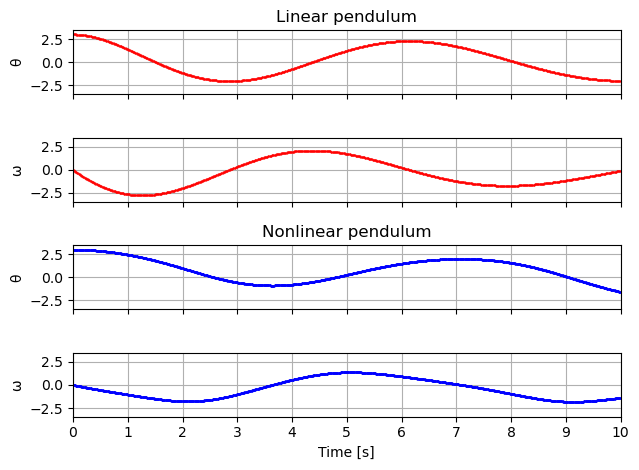

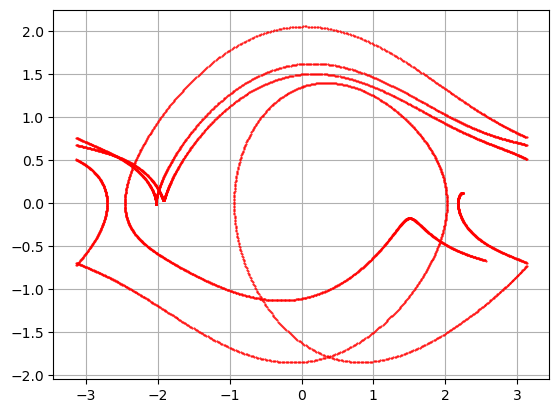

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fn(theta,omega,t): #Nonlinear pendulum equation
    result = (-np.sin(theta) -k*omega - A*np.cos(phi*t)) #g/L = 1
    return result

def fl(theta,omega,t): #Linear pendulum equation
    result = (-theta -k*omega - A*np.cos(phi*t)) #g/L = 1
    return result 

def plotfn(theta,omega,t,dt): #Solving nonlinear ODE
    nsteps=0
    THETA = []
    OMEGA = []
    while nsteps <= iterations:
        nsteps += 1
        k1a = dt * omega
        k1b = dt * fn(theta, omega, t)
        k2a = dt * (omega + k1b)
        k2b = dt * fn(theta + k1a, omega + k1b, t + dt)
        theta = theta + (k1a + k2a) / 2
        if (np.abs(theta) > np.pi+0.2):
            theta -= 2 * np.pi * np.abs(theta) / theta
        omega = omega + (k1b + k2b ) / 2
        THETA.append(theta)
        OMEGA.append(omega)
        t += dt
    return THETA, OMEGA

def plotfl(theta,omega,t,dt): #Solving linear ODE
    nsteps=0
    THETA = []
    OMEGA = []
    while nsteps <= iterations:
        nsteps += 1
        k1a = dt * omega
        k1b = dt * fl(theta, omega, t)
        k2a = dt * (omega + k1b)
        k2b = dt * fl(theta + k1a, omega + k1b, t + dt)
        theta = theta + (k1a + k2a) / 2
        if (np.abs(theta) > np.pi):
            theta -= 2 * np.pi * np.abs(theta) / theta
        omega = omega + (k1b + k2b ) / 2
        t += dt
        THETA.append(theta)
        OMEGA.append(omega)
    return THETA, OMEGA

def plotfnRK(theta,omega,t,dt): #Solving nonlinear ODE
    nsteps=0
    THETA = []
    OMEGA = []
    while nsteps <= iterations:
        nsteps += 1
        k1a = dt * omega
        k1b = dt * fn(theta, omega, t)
        k2a = dt * (omega + k1b/2)
        k2b = dt * fn(theta + k1a/2, omega + k1b/2, t + dt/2)
        k3a = dt * (omega + k2b/2)
        k3b = dt * fn(theta + k2a/2, omega + k2b/2, t + dt/2)
        k4a = dt * (omega + k3b)
        k4b = dt * fn(theta + k3a, omega + k3b, t + dt)
        theta = theta + (k1a + 2*k2a + 2*k3a + k4a) / 6
        omega = omega + (k1b + 2*k2b + 2*k3b + k4b) / 6
        if (np.abs(theta) > np.pi):
            theta -= 2 * np.pi * np.abs(theta) / theta
        THETA.append(theta)
        OMEGA.append(omega)
        t += dt
    return THETA, OMEGA

if __name__ == '__main__':
    
    theta = 3 #not exactly np.pi
    omega = 0.0
    t = 0.0
    dt = 0.01
    A = 1.07
    k = 0.5
    phi = 0.66667
    iterations = 10000

    #Plot setup
    fig, axs = plt.subplots(4,sharex=True, sharey=True)
    axs[0].set_title('Linear pendulum')
    axs[2].set_title('Nonlinear pendulum')
    #fig.text(-0.02, 0.5, 'Amplitude', va='center', ha='center', rotation='vertical')
    axs[3].set_xlabel('Time [s]')
    axs[0].set_ylabel('θ')
    axs[1].set_ylabel('ω')
    axs[2].set_ylabel('θ')
    axs[3].set_ylabel('ω')
    for i in range(4):
        axs[i].grid()
    
    custom_xlim = (0,10)
    custom_ylim = (-np.pi-0.3, np.pi+0.3)
    fig.tight_layout()
    plt.setp(axs, xlim=custom_xlim, ylim=custom_ylim)
    plt.xticks(np.arange(0,11, 1.0))  

    Ltheta, Lomega = plotfl(theta,omega,t,dt)
    Ntheta, Nomega = plotfn(theta,omega,t,dt)
    NRKtheta, NRKomega = plotfnRK(theta,omega,t,dt)
    time = np.arange(0,(iterations+1)*dt,dt)

    axs[0].plot(time, Ltheta, 'ro', markersize=0.5)
    axs[1].plot(time, Lomega, 'ro', markersize=0.5)
    axs[2].plot(time, Ntheta, 'bo', markersize=0.5)
    axs[3].plot(time, Nomega, 'bo', markersize=0.5) 
    axs[2].plot(time, NRKtheta, 'bo', markersize=0.5)
    axs[3].plot(time, NRKomega, 'bo', markersize=0.5)
    plt.show()
        
    NRKomega = NRKomega[5000:]
    NRKtheta = NRKtheta[5000:]
    plt.plot(NRKtheta,NRKomega, 'ro', ms=0.5)
    #plt.xlim(-np.pi,np.pi)
    plt.grid()
    plt.show()